In [1]:
import fix_import
from database import Deviations
import matplotlib.pyplot as plt
from vars import KMirrorSide, SurfaceType
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from database import FY3DImage

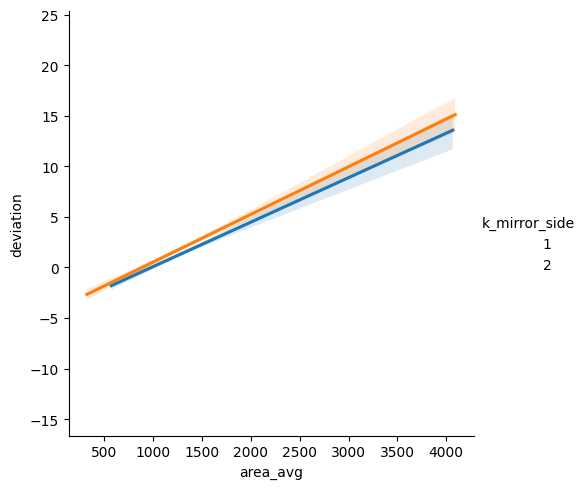

In [24]:
data = Deviations.get_dataframe(year=2023, check_select=False, channel=8, sensor=6)
sns.lmplot(data=data, x="area_avg", y="deviation", hue="k_mirror_side",
          scatter_kws=dict(s=0))

In [12]:
%%time
Deviations.get_dataframe(check_select=False, channel=8, sensor=6)

CPU times: total: 312 ms
Wall time: 331 ms


,year,channel,sensor,deviation,area_avg,area_std,surface_type,k_mirror_side
0,2023,8,6,0.693,1476.057,10.995806,2,2
1,2023,8,6,3.956,1491.264,10.563537,2,1
2,2023,8,6,4.920,1529.780,11.720648,2,2
3,2023,8,6,4.836,1515.394,12.418002,2,1
4,2023,8,6,4.064,1449.816,12.680621,2,1
...,...,...,...,...,...,...,...,...
4099,2020,8,6,-3.320,1779.840,8.880901,1,1
4100,2020,8,6,-1.501,1856.801,26.010025,1,1
4101,2020,8,6,-0.167,1622.357,17.076989,1,1
4102,2020,8,6,-1.733,1604.033,5.338156,1,1


In [17]:
%%time
ranges = pd.DataFrame(columns=["channel", "x_min", "x_max", "y_min", "y_max"])
for channel in range(5, 20):
    sensor_data = Deviations.get_dataframe(channel=channel)
    x_min = sensor_data["area_avg"].min()
    x_max = sensor_data["area_avg"].max()
    y_min = sensor_data["deviation"].min()
    y_max = sensor_data["deviation"].max()
    ranges.loc[len(ranges)] = [channel, x_min, x_max, y_min, y_max]
print(ranges)

    channel    x_min     x_max   y_min   y_max
0       5.0  139.098   404.937  -5.257   3.573
1       6.0  128.787   478.370 -14.969   6.248
2       7.0  146.302   470.712 -12.994  14.355
3       8.0  776.226  4094.100 -30.800  22.639
4       9.0  842.820  4095.000 -18.812  24.958
5      10.0  677.999  4095.000 -18.659  26.011
6      11.0  423.479  4095.000 -17.181  22.109
7      12.0  334.272  4095.000 -19.715  25.525
8      13.0  319.914  4094.600 -19.798  22.461
9      14.0  298.843  4095.000 -22.401  20.580
10     15.0  233.788  4095.000 -24.289  28.321
11     16.0  175.634  1861.058 -25.461  14.385
12     17.0  237.677  1588.427 -15.940  15.190
13     18.0  236.476  1564.629 -25.914  13.079
14     19.0  194.329  1428.698 -16.202  10.128
CPU times: total: 4.56 s
Wall time: 4.59 s


In [19]:
_, x_min, x_max, y_min, y_max = ranges[ranges.channel == 5].squeeze()
print(x_min)

139.098


In [23]:
%%time
side_2_data = Deviations.get_dataframe(year=2023, channel=5, sensor=5,
                                                               k_mirror_side=KMirrorSide.SIDE_2)

CPU times: total: 188 ms
Wall time: 197 ms


In [4]:
%%time
df = Deviations.get_dataframe()

CPU times: total: 12.8 s
Wall time: 13.1 s


In [6]:
%%time
df[df.channel==10]

CPU times: total: 31.2 ms
Wall time: 13 ms


,year,channel,sensor,deviation,area_avg,area_std,surface_type,k_mirror_side
50,2023,10,0,-0.108,2024.398,19.451416,2,2
51,2023,10,1,0.072,2024.398,19.451416,2,2
52,2023,10,2,3.022,2024.398,19.451416,2,2
53,2023,10,3,4.232,2024.398,19.451416,2,2
54,2023,10,4,3.432,2024.398,19.451416,2,2
...,...,...,...,...,...,...,...,...
926605,2021,10,5,-1.702,1033.442,3.502376,1,1
926606,2021,10,6,-1.112,1033.442,3.502376,1,1
926607,2021,10,7,1.248,1033.442,3.502376,1,1
926608,2021,10,8,2.608,1033.442,3.502376,1,1


In [5]:
FY3DImage.select().where(FY3DImage.year == 2020).count()

23